[//]: <> (Table of content)
<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Table of content</b></div>

<div style="background-color:black; padding:30px; font-size:15px;color:#00FF00">
    
* [1. Introduction](#1)
    - [Problem statement](#1.1)
    - [Data description](#1.2)
    
* [2. Import libraries](#2) 
    
* [3. Basic Exploration](#3)
    - [Read dataset](#3.1)
    - [Some information](#3.2)
    - [Data transformation](#3.3)
    - [Data visualization](#3.4)
* [4. Machine Learning model](#4)
    
* [5 Conclusion](#5)

* [6 Author Message](#6)

[//]: <> (1. Introduction)
<a id="1"></a>
# <div style="padding:20px;color:#ffffff;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Introduction</b></div>


[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Problem Statement</b></h2>


[//]: <> (Text)
<span style="font-size:14px; font-family:Verdana; color: #ffffff;"> 

1. How do customer personalities differ in terms of their demographics (e.g., age, gender, income, education, etc.)?
2. How do customer personalities differ in terms of their purchase behavior (e.g., product categories purchased, frequency of purchases, amount spent per purchase, etc.)?
3. How do customer personalities differ in terms of their response to marketing campaigns?
4. What are the factors that influence the correlation between income and spending?
</span>


[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Data description</b></h2>


[//]: <> (Text)
<span style="font-size:14px; font-family:Verdana; color: #ffffff;"> 

1. People
  - ID: Customer's unique identifier
  - Year_Birth: Customer's birth year
  - Education: Customer's education level
  - Marital_Status: Customer's marital status
  - Income: Customer's yearly household income
  - Kidhome: Number of children in customer's household
  - Teenhome: Number of teenagers in customer's household
  - Dt_Customer: Date of customer's enrollment with the company
  - Recency: Number of days since customer's last purchase
  - Complain: 1 if the customer complained in the last 2 years, 0 otherwise

2. Products
  - MntWines: Amount spent on wine in last 2 years
  - MntFruits: Amount spent on fruits in last 2 years
  - MntMeatProducts: Amount spent on meat in last 2 years
  - MntFishProducts: Amount spent on fish in last 2 years
  - MntSweetProducts: Amount spent on sweets in last 2 years
  - MntGoldProds: Amount spent on gold in last 2 years

3. Promotion
  - NumDealsPurchases: Number of purchases made with a discount
  - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
  - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
  - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
  - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
  - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
  - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

4. Place
  - NumWebPurchases: Number of purchases made through the company’s website
  - NumCatalogPurchases: Number of purchases made using a catalogue
  - NumStorePurchases: Number of purchases made directly in stores
  - NumWebVisitsMonth: Number of visits to company’s website in the last month

</span>




[//]: <> 
<a id="1"></a>
# <div style="padding:20px;color:#ffffff;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Import libraries</b></div>


In [1]:
import os, sys
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, normalize
from sklearn.mixture import GaussianMixture
import statsmodels.formula.api as smf

print("Setup complete!")

Setup complete!


<a id="1"></a>
# <div style="padding:20px;color:#ffffff;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Basic Exploration</b></div>


<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Read Dataset</b></h2>


In [2]:
data_path = 'Data/marketing_campaign.csv'
print(os.path.exists(data_path))

True


In [3]:
df=pd.read_csv(data_path, delimiter='\t')
print('Shape of data:', df.shape)

Shape of data: (2240, 29)


[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Some Information</b></h2>


In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
del df['ID']
print('Shape of data:', df.shape)

Shape of data: (2240, 28)


In [6]:
df.tail()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,3,11,0
2239,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,...,7,0,0,0,0,0,0,3,11,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

[//]: <> (Text)
<span style="font-size:14px; font-family:Verdana; color: #ffffff;"> 
There are exactly 24 missing values in the income feature.
</span>

In [8]:
features_name=df.columns.tolist()
print(features_name)

['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [9]:
df.skew(axis=0, skipna=True)

C:\Users\Thanh\AppData\Local\Temp\ipykernel_13624\3081074228.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis=0, skipna=True)


Year_Birth             -0.349944
Income                  6.763487
Kidhome                 0.635288
Teenhome                0.407115
Recency                -0.001987
MntWines                1.175771
MntFruits               2.102063
MntMeatProducts         2.083233
MntFishProducts         1.919769
MntSweetProducts        2.136081
MntGoldProds            1.886106
NumDealsPurchases       2.418569
NumWebPurchases         1.382794
NumCatalogPurchases     1.880989
NumStorePurchases       0.702237
NumWebVisitsMonth       0.207926
AcceptedCmp3            3.291705
AcceptedCmp4            3.241574
AcceptedCmp5            3.291705
AcceptedCmp1            3.555444
AcceptedCmp2            8.472093
Complain               10.188972
Z_CostContact           0.000000
Z_Revenue               0.000000
Response                1.971555
dtype: float64

[//]: <> 
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Data Preprocessing</b></h2>


[//]: <> (Missing Data Treatment)
> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
Missing Data Treatment</b></span>

In [10]:
mean_of_income=round(df['Income'].mean(), 0)
print("Mean of income: ", mean_of_income)

df['Income'] = df['Income'].replace(np.nan, mean_of_income)

Mean of income:  52247.0


[//]: <> (Missing Data Treatment)
> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
Feature Rename</b></span>

In [11]:
rename_mapping = {
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold',
    'NumDealsPurchases': 'Deals',
    'NumWebPurchases': 'Web',
    'NumCatalogPurchases': 'Catalog',
    'NumStorePurchases': 'Store',
    'NumWebVisitsMonth': 'WebVisitsMonth'
}

df = df.rename(columns=rename_mapping)


[//]: <> (Missing Data Treatment)
> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
Handle Noisy Data</b></span>

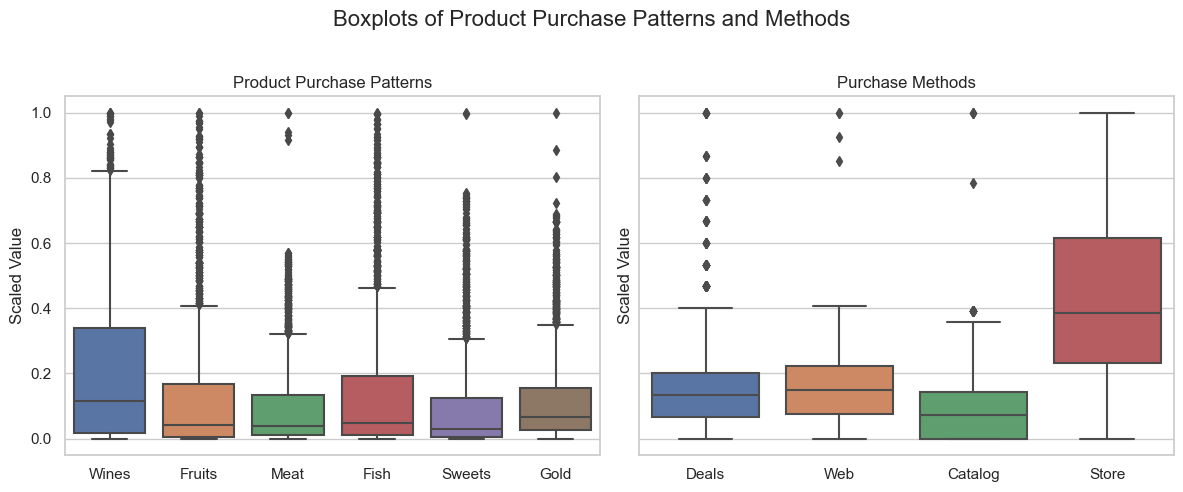

In [12]:
product_features = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
purchase_methods = ['Deals', 'Web', 'Catalog', 'Store']

X_products = df[product_features].copy()
X_purchases = df[purchase_methods].copy()

def scaled_data(scaler, X):
  """Scales the given data using the given scaler.

  Args:
    scaler: A sklearn.preprocessing.Scaler object.
    X: A Pandas DataFrame.

  Returns:
    A Pandas DataFrame with the scaled data.
  """

  scaled_X = scaler.fit_transform(X)
  return scaled_X

def plot_boxplot(data: pd.DataFrame, ax=None):
  """Plots a boxplot of the given data.

  Args:
    data: A Pandas DataFrame.
    ax: A Matplotlib Axes object. If None, a new Axes object will be created.

  Returns:
    A Matplotlib Axes object with the boxplot plotted.
  """
  
  if ax is None:
    ax = sns.boxplot(data=data)
  else:
    sns.boxplot(data=data, ax=ax)

  return ax

# Scale the product and purchase data
scaled_X_products = scaled_data(MinMaxScaler(), X_products)
scaled_X_purchases = scaled_data(MinMaxScaler(), X_purchases)

# Plotting 
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

plot_boxplot(pd.DataFrame(scaled_X_products, columns=product_features), axes[0])
plot_boxplot(pd.DataFrame(scaled_X_purchases, columns=purchase_methods), axes[1])

axes[0].set_ylabel('Scaled Value')
axes[0].set_title('Product Purchase Patterns')
axes[1].set_ylabel('Scaled Value')
axes[1].set_title('Purchase Methods')

plt.suptitle('Boxplots of Product Purchase Patterns and Methods', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [13]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

# clustering=DBSCAN(eps=0.5, min_samples=4)
# res_df=clustering.fit_predict(X)

# plt.scatter(X['MntWines'], X['MntFruits'], c=res_df, cmap='viridis')
# plt.xlabel('MntWines')
# plt.ylabel('MntFruits')
# plt.title('DBSCAN Clustering with Outliers')
# plt.show()

# # Noise points are the outliers
# outliers = X[res_df == -1]
# print("Detected outliers:")
# outliers

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each selected column
for col in product_features:
    df_ = remove_outliers_iqr(df, col)

# Display the DataFrame after removing outliers
print("DataFrame after removing outliers:")
df_.shape



DataFrame after removing outliers:


(2033, 28)

[//]: <> (Missing Data Treatment)
> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
Data Transformation</b></span>

In [14]:
print('Before grouping: ')
print('Education: ', df['Education'].unique().tolist())
print('Marital Status:', df['Marital_Status'].unique().tolist())


education_to_group = {
    'Graduation': 'Graduate',
    'PhD': 'Graduate',
    'Master': 'Graduate',
    'Basic': 'Non-Graduate',
    '2n Cycle': 'Non-Graduate'
}

marital_status_to_group = {
    'Single': 'Alone',
    'Together': 'To_Couple',
    'Married': 'To_Couple',
    'Divorced': 'Alone', 
    'Widow': 'Alone',
    'Alone': 'Alone',
    'Absurd': 'Alone',
    'YOLO': 'Alone',
}

df['Education'] = df['Education'].map(education_to_group).astype('object')
df['Marital_Status'] = df['Marital_Status'].map(marital_status_to_group).astype('object')

print('\nAfter grouping:')
print('Education: ', df['Education'].unique().tolist())
print('Marital Status', df['Marital_Status'].unique().tolist())

Before grouping: 
Education:  ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
Marital Status: ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']

After grouping:
Education:  ['Graduate', 'Non-Graduate']
Marital Status ['Alone', 'To_Couple']


In [15]:
current_date = dt.date.today()
current_year = current_date.year

df['Age'] = current_year - df['Year_Birth']

df['Children'] = df['Kidhome'] + df['Teenhome']
df['Has_Child'] = (df['Children'] > 0).astype('bool')

last_date = dt.date(2014, 12, 28)
df['Seniority'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, format = '%d-%m-%Y')
df['Seniority'] = round(pd.to_numeric(df['Seniority'].dt.date.apply(lambda x: last_date - x).dt.days, downcast='integer')/30, 2)

product_feature_indices = [df.columns.get_loc(feature) for feature in product_features]
df['Spending'] = df.iloc[:, product_feature_indices].sum(axis=1)

campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
marketing_campaign = df[campaigns].copy()
marketing_campaign['Num_Acceptance'] = (marketing_campaign).eq(1).sum(axis=1).astype('int64')
customer_categories = {
    0: 'Churned',
    1: 'New', 
    2: 'Engaged', 
    3: 'Loyal', 
    4: 'Repeat', 
    5: 'Valued'
}

df['Customer_Category'] = marketing_campaign['Num_Acceptance'].map(customer_categories)

In [16]:
age_cut_labels = ['Child', 'Young', 'Middle-aged', 'Old']
df['Age_Group'] = pd.cut(x=df['Age'], bins=[0, 16, 30, 45, 200], labels=age_cut_labels).astype('object')

income_cut_labels = ['Low', 'Lower-middle', 'Upper-middle', 'High']
df['Income_Group'] = pd.qcut(x=df['Income'], q=4, labels=income_cut_labels).astype('object')

print('Age Groups: ', df['Age_Group'].unique().tolist())
print('Income_Groups: ', df['Income_Group'].unique().tolist())

Age Groups:  ['Old', 'Middle-aged', 'Young']
Income_Groups:  ['Upper-middle', 'Lower-middle', 'High', 'Low']


[//]: <> 
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Data Visualization</b></h2>


In [17]:
def count_feature_values(data, feature_name):
  grouped_data = data.groupby(feature_name).size().reset_index().rename(
    columns={feature_name: feature_name, 0: 'Count'}).sort_values(by='Count', ascending=False).reset_index(drop=True)
  grouped_data[feature_name] = grouped_data[feature_name].astype('object')
  return grouped_data
  
def plot_histogram(data, mean_value, ax=None ,color='gray'):
  sns.histplot(ax=ax, data=data, color=color)
  ax.axhline(y=mean_value, color='red', linestyle='dashed')

def plot_bar_chart(data, x_name, y_name, speical_column=None, ax=None, color='gray'):
  sns.barplot(ax=ax, data=data, x=x_name, y=y_name, 
    palette=[color if x!=speical_column else 'r' for x in data[x_name].tolist()])

    

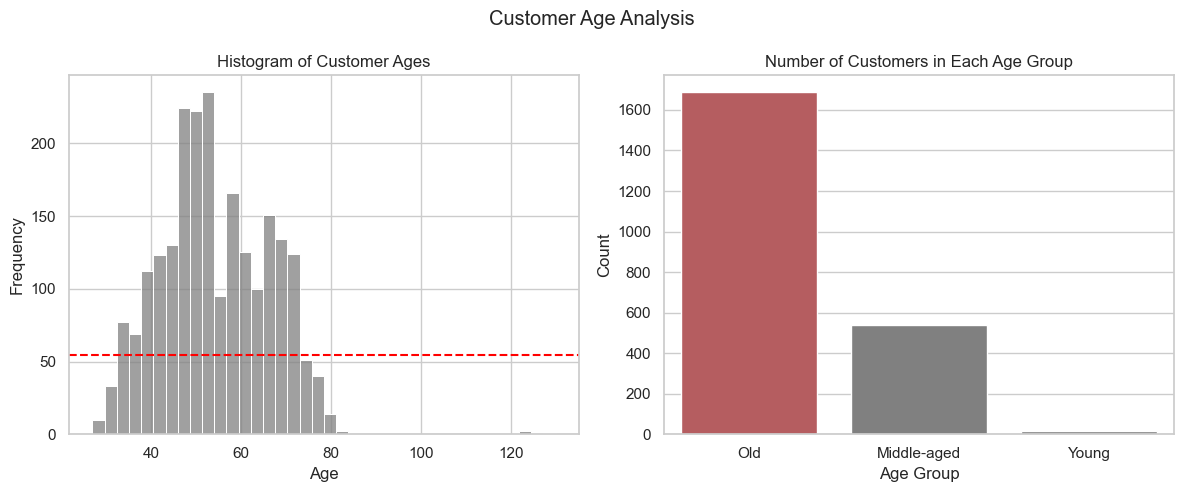

In [18]:
age_grouped_df = count_feature_values(df, 'Age_Group')
mean_age = df['Age'].mean()

# Ploting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_histogram(df['Age'], mean_age, axes[0])
plot_bar_chart(age_grouped_df, 'Age_Group', 'Count', age_grouped_df['Age_Group'][0], axes[1])

plt.suptitle('Customer Age Analysis')
axes[0].set_title('Histogram of Customer Ages')
axes[1].set_title('Number of Customers in Each Age Group')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

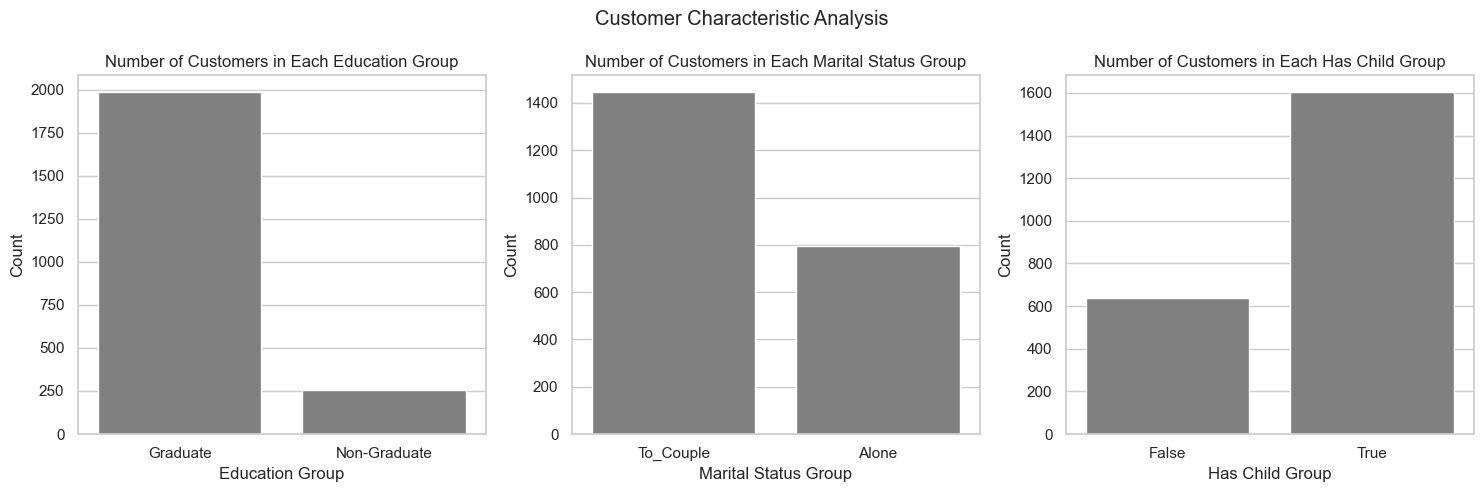

In [19]:
edu_grouped_df = count_feature_values(df, 'Education')
marital_df = count_feature_values(df, 'Marital_Status')
has_child_df = count_feature_values(df, 'Has_Child')
# Ploting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plot_bar_chart(edu_grouped_df, 'Education', 'Count', ax=axes[0])
plot_bar_chart(marital_df, 'Marital_Status', 'Count', ax=axes[1])
plot_bar_chart(has_child_df, 'Has_Child', 'Count', ax=axes[2])

plt.suptitle('Customer Characteristic Analysis')
axes[0].set_title('Number of Customers in Each Education Group')
axes[1].set_title('Number of Customers in Each Marital Status Group')
axes[2].set_title('Number of Customers in Each Has Child Group')
axes[0].set_xlabel('Education Group')
axes[0].set_ylabel('Count')
axes[1].set_xlabel('Marital Status Group')
axes[1].set_ylabel('Count')
axes[2].set_xlabel('Has Child Group')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


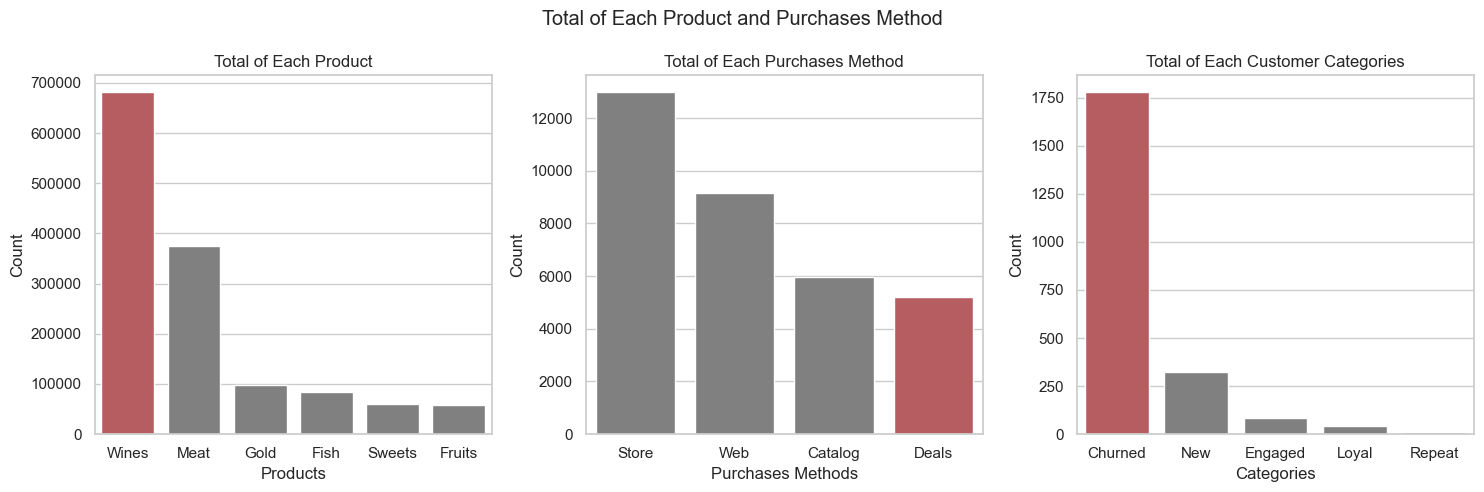

In [20]:
def summarize_and_plot(data, x_col, y_col, ax):
    summary = data.reset_index().rename(
        columns={'index': x_col, 0: y_col}).sort_values(by=y_col, ascending=False)
    plot_bar_chart(summary, x_col, y_col, summary[x_col][0], ax)

# Summarize and plot for products
total_each_product = X_products.sum()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
summarize_and_plot(total_each_product, 'Product', 'Count', axes[0])

# Summarize and plot for purchases
total_each_purchases = X_purchases.sum()
summarize_and_plot(total_each_purchases, 'Method', 'Count', axes[1])

#
customer_categories_df = count_feature_values(df, 'Customer_Category')
plot_bar_chart(customer_categories_df, 'Customer_Category', 'Count', customer_categories_df['Customer_Category'][0], axes[2])

plt.suptitle('Total of Each Product and Purchases Method')
axes[0].set_title('Total of Each Product')
axes[1].set_title('Total of Each Purchases Method')
axes[2].set_title('Total of Each Customer Categories')
axes[0].set_xlabel('Products')
axes[0].set_ylabel('Count')
axes[1].set_xlabel('Purchases Methods')
axes[1].set_ylabel('Count')
axes[2].set_xlabel('Categories')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


[//]: <> (1. Introduction)
<a id="1"></a>
# <div style="padding:20px;color:#ffffff;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Machine Learning Model</b></div>


In [21]:
selected_features = ['Age_Group', 'Education', 'Marital_Status', 'Has_Child', 'Income', 'Income_Group', 
                    'Seniority', 'Spending', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Customer_Category']
data = df[selected_features]
data.head()

,Age_Group,Education,Marital_Status,Has_Child,Income,Income_Group,Seniority,Spending,Wines,Fruits,Meat,Fish,Sweets,Gold,Customer_Category
0,Old,Graduate,Alone,False,58138.0,Upper-middle,28.17,1617,635,88,546,172,88,88,Churned
1,Old,Graduate,Alone,True,46344.0,Lower-middle,9.83,27,11,1,6,2,1,6,Churned
2,Old,Graduate,To_Couple,False,71613.0,High,16.47,776,426,49,127,111,21,42,Churned
3,Middle-aged,Graduate,To_Couple,True,26646.0,Low,10.70,53,11,4,20,10,3,5,Churned
4,Middle-aged,Graduate,To_Couple,True,58293.0,Upper-middle,11.43,422,173,43,118,46,27,15,Churned


In [22]:
print ('Descriptive Statistic:\n ', data[['Income', 'Seniority', 'Spending']].describe())

scaler = StandardScaler()
X_std = scaler.fit_transform(data[['Income', 'Seniority', 'Spending']])
X = normalize(X_std, norm='l2')
  
# Create a function to create cluster labels
def create_cluster_labels(data, X, n_components=4, covariance_type='spherical', max_iter=2000, random_state=5):
  """Creates cluster labels for the given data using a Gaussian mixture model.

  Args:
    data: A Pandas DataFrame.
    n_components: The number of clusters.
    covariance_type: The covariance type to use.
    max_iter: The maximum number of iterations to run the EM algorithm.
    random_state: The random state to use.

  Returns:
    A Pandas Series containing the cluster labels for each customer.
  """
  gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, max_iter=max_iter, random_state=random_state)
  labels = gmm.fit_predict(X)

  return pd.Series(labels, name='Cluster')

# Merge the cluster labels with the original data
cluster_labels = create_cluster_labels(data, X)
cluster_labels = cluster_labels.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
data = pd.merge(data, cluster_labels, left_index=True, right_index=True)

# Summary of the data by cluster
pd.options.display.float_format = "{:.0f}".format

summary = data[['Income', 'Spending', 'Seniority', 'Cluster']]
summary.set_index('Cluster', inplace=True)
summary = summary.groupby('Cluster').describe().transpose()
print('\nSummary: ')
print(summary.head())

need_attention_product = data.loc[data['Cluster'] == 'Need attention'][product_features].count().idxmax()
print('\nWhich product needs attention: ', need_attention_product)

leaky_bucket_campaign = df.loc[data['Cluster'] == 'Leaky bucket'][campaigns].count().idxmax()
print('\nWhich campaign is in the leaky bucket: ', leaky_bucket_campaign)



Descriptive Statistic:
                Income    Seniority     Spending
count    2240.000000  2240.000000  2240.000000
mean    52247.248661    17.852737   605.798214
std     25037.797168     6.737546   602.249288
min      1730.000000     6.070000     5.000000
25%     35538.750000    12.092500    68.750000
50%     51741.500000    17.915000   396.000000
75%     68289.750000    23.700000  1045.500000
max    666666.000000    29.370000  2525.000000



Summary: 
Cluster       High potential  Leaky bucket  Need attention  Stars
Income count             670           446             595    529
       mean            38631         75154           35195  69360
       std             12933         31309           12191  12391
       min              1730         49090            3502   2447
       25%             29544         65486           26696  60839

Which product needs attention:  Wines

Which campaign is in the leaky bucket:  AcceptedCmp1


[//]: <> (Text)
<span style="font-size:14px; font-family:Verdana; color: #ffffff;"> 

1. Income:
   - Mean income: ~$52,247
   - Standard deviation: ~$25,038
2. Seniority:
   - Mean seniority: ~17.85 years
   - Standard deviation: ~6.74 years
3. Spending:
   - Mean spending: ~$605.80
   - Standard deviation: ~$602.25

- The summary statistics for different income clusters provide insights into income distribution within each cluster. For instance, the "Leaky bucket" cluster has the highest mean income and standard deviation, indicating a wider income range in this group.

</span>



In [23]:
import plotly.graph_objects as go

plot = go.Figure()

# Iterate over the unique cluster labels and add a trace for each cluster
for cluster in data['Cluster'].unique():
    plot.add_trace(go.Scatter3d(
        x=data[data['Cluster'] == cluster]['Income'],
        y=data[data['Cluster'] == cluster]['Seniority'],
        z=data[data['Cluster'] == cluster]['Spending'],
        mode='markers',
        marker_size=6,
        marker_line_width=1,
        name=str(cluster)
    ))

# Update the hover template for the traces
plot.update_traces(
    hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}'
)

plot.update_layout(
    width=800,
    height=800,
    autosize=True,
    showlegend=True,
    legend_title_text='Cluster',
    legend_title_font_family='Gilroy',
    legend_title_font_size=12,
    legend_title_font_color='black',
    scene=dict(
        xaxis=dict(title='Income', titlefont_color='black'),
        yaxis=dict(title='Seniority', titlefont_color='black'),
        zaxis=dict(title='Spending', titlefont_color='black')
    ),
    font=dict(family='Gilroy', color='black', size=12)
)

plot.show()

In [24]:
income = data['Income']
spending = data['Spending']

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(income, spending)[0, 1]

# Print the correlation coefficient
print('The correlation coefficient between income and spending is:', correlation_coefficient)

The correlation coefficient between income and spending is: 0.664706518597218


In [25]:
model_1 = smf.ols('Spending ~ Income', data=df)
results = model_1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     1772.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.08e-285
Time:                        20:34:54   Log-Likelihood:                -16862.
No. Observations:                2240   AIC:                         3.373e+04
Df Residuals:                    2238   BIC:                         3.374e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -229.5615     22.007    -10.431      0.0

In [26]:
related_factors = ['Seniority']

model_2 = smf.ols(f'Spending ~ Income + {" + ".join(related_factors)}', data=data)
results = model_2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     996.3
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          3.79e-310
Time:                        20:34:54   Log-Likelihood:                -16802.
No. Observations:                2240   AIC:                         3.361e+04
Df Residuals:                    2237   BIC:                         3.363e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -506.6509     32.849    -15.424      0.0

In [27]:
related_factors = ['Seniority', 'Marital_Status']

model_2 = smf.ols(f'Spending ~ Income + {" + ".join(related_factors)}', data=data)
results = model_2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     665.0
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          5.93e-309
Time:                        20:34:54   Log-Likelihood:                -16801.
No. Observations:                2240   AIC:                         3.361e+04
Df Residuals:                    2236   BIC:                         3.363e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [28]:
related_factors = ['Seniority', 'Marital_Status', 'Has_Child']

model_2 = smf.ols(f'Spending ~ Income + {" + ".join(related_factors)}', data=data)
results = model_2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     747.9
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:34:54   Log-Likelihood:                -16564.
No. Observations:                2240   AIC:                         3.314e+04
Df Residuals:                    2235   BIC:                         3.317e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

[//]: <> (Text)
<span style="font-size:14px; font-family:Verdana; color: #ffffff;"> 

1. Summary of your findings:
- You performed an OLS regression to see the relationship between income and spending, based on some factors. You found that Seniority has a significant effect on the coefficient of income, so you chose this model.
- All of the variables in the model have a statistically significant relationship with Spending, with p-values less than 0.05.
- The Adjusted R-squared for the model is 0.471, which means that the model explains 47.1% of the variation in Spending. This is a good fit for the data.

2. Interpretation:
- The positive coefficient of Income means that as Income increases, Spending also tends to increase.
- The negative coefficient of Seniority means that as Seniority increases, Spending tends to decrease. This could be because senior employees have more experience and are better able to manage their finances.
- The Intercept represents the average Spending when Income and Seniority are equal to zero.
- Overall, your findings suggest that there is a strong relationship between income and spending, and that Seniority also plays a role in influencing spending.

3. Additional comments:
- It is important to note that correlation does not equal causation. Just because there is a relationship between income and spending does not mean that income causes spending. There could be other factors that are causing both income and spending to increase or decrease.
- Additionally, the Adjusted R-squared of 0.471 means that the model explains 47.1% of the variation in Spending. The remaining 52.9% of the variation in Spending is unexplained by the model. This could be due to other factors that are not included in the model, or it could be due to random noise.
- Overall, your findings provide valuable insights into the relationship between income and spending. However, it is important to interpret the results with caution and to keep in mind the limitations of the model.

</span>


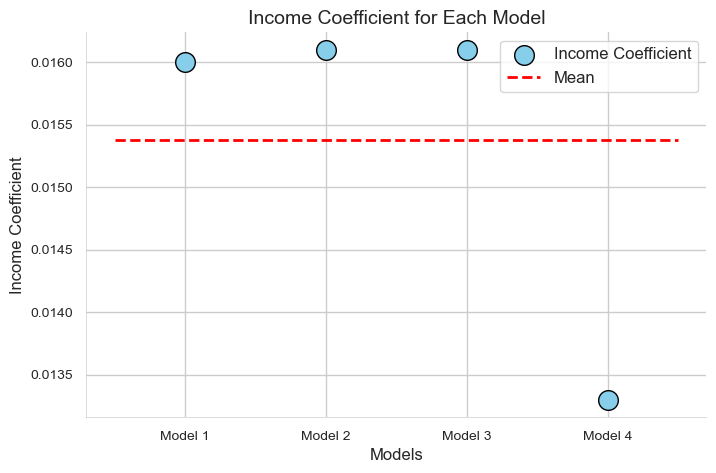

In [29]:
import matplotlib.pyplot as plt

# Income coefficient for each model
income_coefficient = [0.016, 0.0161, 0.0161, 0.0133]
x_labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(x_labels, income_coefficient, color='skyblue', label='Income Coefficient', s=200, edgecolor='black')
ax.hlines(y=sum(income_coefficient)/len(income_coefficient), xmin=-0.5, xmax=len(x_labels)-0.5, color='red', linestyle='dashed', linewidth=2, label='Mean')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Income Coefficient', fontsize=12)
ax.set_title('Income Coefficient for Each Model', fontsize=14)
ax.legend(fontsize=12)

# Beautify the axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()


In [30]:
def segment_data(column, cut_labels):
    return pd.qcut(column.where(column > 0), q=[0, 0.25, 0.75, 1], labels=cut_labels).astype("object")


cut_labels = ['Low consumer', 'Frequent consumer', 'Biggest consumer']
products = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
for product in products:
    column_name = f'{product}_segment'
    data[column_name] = segment_data(data[product], cut_labels)

data.fillna("Non consumer", inplace=True)
data.drop(columns=['Spending', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'], inplace=True)
data = data.astype(object)
data.head()

,Age_Group,Education,Marital_Status,Has_Child,Income,Income_Group,Seniority,Customer_Category,Cluster,Wines_segment,Fruits_segment,Meat_segment,Fish_segment,Sweets_segment,Gold_segment
0,Old,Graduate,Alone,False,58138,Upper-middle,28,Churned,Stars,Biggest consumer,Biggest consumer,Biggest consumer,Biggest consumer,Biggest consumer,Biggest consumer
1,Old,Graduate,Alone,True,46344,Lower-middle,10,Churned,High potential,Low consumer,Low consumer,Low consumer,Low consumer,Low consumer,Low consumer
2,Old,Graduate,To_Couple,False,71613,High,16,Churned,Leaky bucket,Frequent consumer,Biggest consumer,Frequent consumer,Biggest consumer,Frequent consumer,Frequent consumer
3,Middle-aged,Graduate,To_Couple,True,26646,Low,11,Churned,High potential,Low consumer,Low consumer,Frequent consumer,Frequent consumer,Low consumer,Low consumer
4,Middle-aged,Graduate,To_Couple,True,58293,Upper-middle,11,Churned,High potential,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer


In [31]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format

def preprocess_data(data):
    # Perform one-hot encoding
    df = pd.get_dummies(data.copy())
    df.index = df.index.astype(int)
    return df

def find_association_rules(data, product, segment, min_support=0.08, max_len=10):
    # Apply Apriori algorithm
    frequent_items = apriori(data, use_colnames=True, min_support=min_support, max_len=max_len + 1)

    # Find association rules
    rules = association_rules(frequent_items, metric='lift', min_threshold=1)

    # Filter rules based on product and segment
    target = f"{{'{product}_segment_{segment}'}}"
    results = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

    return results

association = data.copy()
df_ = preprocess_data(association)

# Specify product and segment
product = 'Wines'
segment = 'Biggest consumer'

# Find association rules
results = find_association_rules(df_, product, segment)

mean_confidence = results['confidence'].mean()
results.loc[results['confidence'] >= mean_confidence].head()


C:\Users\Thanh\AppData\Local\Temp\ipykernel_13624\3046131935.py:12: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

C:\Users\Thanh\AppData\Local\Temp\ipykernel_13624\3046131935.py:12: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

c:\Users\Thanh\anaconda3\envs\env\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4135,"(Cluster_Stars, Income_Group_High)",(Wines_segment_Biggest consumer),0.121,0.248,0.084,0.697,2.810,0.054,2.485,0.733
6417,"(Cluster_Stars, Age_Group_Old, Education_Graduate)",(Wines_segment_Biggest consumer),0.175,0.248,0.120,0.684,2.754,0.076,2.377,0.772
1272,"(Cluster_Stars, Age_Group_Old)",(Wines_segment_Biggest consumer),0.188,0.248,0.126,0.668,2.692,0.079,2.266,0.774
13042,"(Cluster_Stars, Meat_segment_Biggest consumer, Education_Graduate)",(Wines_segment_Biggest consumer),0.121,0.248,0.081,0.665,2.681,0.051,2.247,0.714
10125,"(Cluster_Stars, Marital_Status_To_Couple, Education_Graduate)",(Wines_segment_Biggest consumer),0.137,0.248,0.089,0.650,2.620,0.055,2.150,0.716




[//]: <> (Text)
<span style="font-size:14px; font-family:Verdana; color: #ffffff;"> 

The association rules reveal significant patterns in customer preferences and behaviors based on various demographic and cluster-related factors. These patterns are crucial for understanding and tailoring marketing strategies to specific customer segments. Notably, customers in the "Stars" cluster show a strong preference for being the biggest consumers of the Wines segment, especially when they have high income or are older with a graduate-level education. Additionally, the association of meat consumption with a preference for wine further emphasizes potential marketing opportunities for these segments. Leveraging these insights can lead to targeted marketing campaigns, ultimately enhancing customer engagement and satisfaction.

</span>

[//]: <> (Author Message)
<div style="border-radius:10px;border:#00FF00 solid;padding: 15px;background-color:black;font-size:90%;text-align:left">

<h4><b>Author :</b> Nguyen Tuan Thanh </h4>

<h4> <b>Some information:</b> </h4>

<b>👉Read more project :</b> <span style="color: #00FF00;">https://www.kaggle.com/nttthanh</span> <br>
<b>👉Shoot me mails :</b> <span style="color: #00FF00;">thanh.ntt0504@gmail.com</span><br>
<b>👉Connect on LinkedIn :</b> <span style="color: #00FF00;">https://www.linkedin.com/in/ntthanh0504/</span> <br>
<b>👉Explore Github :</b> <span style="color: #00FF00;">https://github.com/ntthanh0504</span> <br>
    
    
<center> <strong style="color: #00FF00;"> If you liked this Notebook, please do upvote. </strong>
    
<center> <strong style="color: #00FF00;"> If you have any questions, feel free to comment! </strong>
    
<center> <strong style="color: #00FF00;"> ✨Best Wishes✨ </strong>
